In [2]:
# TensorFlow ve Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Diğer gerekli kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
# Veri setinizin yolu
data_dir = 'Dataset/'

# Sınıf isimlerini otomatik olarak almak için
classes = sorted(os.listdir(data_dir))
# Dizin yapısını kontrol etme
sınıflar = []
for emisyon in sorted(os.listdir(data_dir)):
    emisyon_path = os.path.join(data_dir, emisyon)
    if os.path.isdir(emisyon_path):
        for para_birim in sorted(os.listdir(emisyon_path)):
            # Para birimi altındaki görüntü dosyalarını almak için
            para_birim_path = os.path.join(emisyon_path, para_birim)
            if os.path.isdir(para_birim_path):
                sınıf_adı = f"{emisyon}_{para_birim}"  # Sınıf adını oluştur
                sınıflar.append(sınıf_adı)
                print(f"Sınıf: {sınıf_adı}, Resimler: {[img for img in os.listdir(para_birim_path)]}")

# Sınıf isimlerini yazdır
print("Oluşturulan Sınıf İsimleri:", sınıflar)

Sınıf: 1.Emisyon_10Lira, Resimler: ['12921a.jpg', '12921a_Blur.jpg', '12921a_GaussNoise.jpg', '12921a_HorizontalFlip.jpg', '12921a_RandomBrightnessContrast.jpg', '12921a_Rotate.jpg', '12921a_VerticalFlip.jpg', '12921z.jpg', '12921z_Blur.jpg', '12921z_GaussNoise.jpg', '12921z_HorizontalFlip.jpg', '12921z_RandomBrightnessContrast.jpg', '12921z_Rotate.jpg', '12921z_VerticalFlip.jpg', '14305a.jpg', '14305a_Blur.jpg', '14305a_GaussNoise.jpg', '14305a_HorizontalFlip.jpg', '14305a_RandomBrightnessContrast.jpg', '14305a_Rotate.jpg', '14305a_VerticalFlip.jpg', '14305z.jpg', '14305z_Blur.jpg', '14305z_GaussNoise.jpg', '14305z_HorizontalFlip.jpg', '14305z_RandomBrightnessContrast.jpg', '14305z_Rotate.jpg', '14305z_VerticalFlip.jpg', '1_frame_0.jpg', '1_frame_0_Blur.jpg', '1_frame_0_GaussNoise.jpg', '1_frame_0_HorizontalFlip.jpg', '1_frame_0_RandomBrightnessContrast.jpg', '1_frame_0_Rotate.jpg', '1_frame_0_VerticalFlip.jpg', '1_frame_10.jpg', '1_frame_100.jpg', '1_frame_100_Blur.jpg', '1_frame_100

In [11]:
# Veri ön işleme (sadece yeniden ölçeklendirme)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # %80 eğitim, %20 doğrulama
)

# Eğitim veri seti
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),  # Xception için giriş boyutu
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Eğitim verisi
    shuffle=True
)

# Doğrulama veri seti
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),  # Xception için giriş boyutu
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Doğrulama verisi
    shuffle=False
)

# Veri seti bilgilerini kontrol etme
print("Eğitim veri seti sınıf sayısı:", train_generator.num_classes)
print("Doğrulama veri seti sınıf sayısı:", validation_generator.num_classes)

Found 7446 images belonging to 5 classes.
Found 1858 images belonging to 5 classes.
Eğitim veri seti sınıf sayısı: 5
Doğrulama veri seti sınıf sayısı: 5


In [12]:
# Kendi CNN modelinizi oluşturma
# CNN modeli
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dense(len(classes), activation='softmax')  # Sınıf sayısına göre çıktı katmanı
])

# Model özetini görüntüleme
cnn_model.summary()

# Hiperparametreler
learning_rate = 0.001
batch_size = 32
epochs = 10

# Modeli derleme
cnn_model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Modeli eğitme
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

# **Hiperparametre	Değer**
Öğrenme Oranı	0.001 -
Batch Boyutu	32 -
Epoch Sayısı	20 -
Optimizatör	Adam -
Kayıp Fonksiyonu -	Categorical Crossentropy

59/59 [==============================] - 33s 558ms/step
Sınıflandırma Raporu:
               precision    recall  f1-score   support

   1.Emisyon       0.97      0.33      0.49       275
   2.Emisyon       0.63      0.95      0.76       603
   3.Emisyon       0.58      0.43      0.49       409
   4.Emisyon       0.39      0.75      0.51       150
   5.Emisyon       0.79      0.51      0.62       421

    accuracy                           0.63      1858
   macro avg       0.67      0.59      0.57      1858
weighted avg       0.69      0.63      0.61      1858



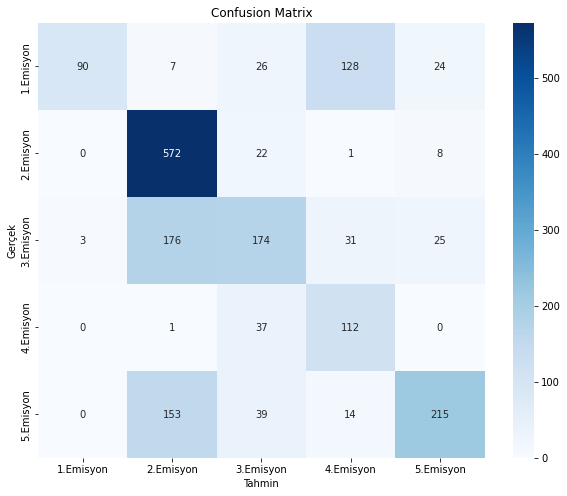

Genel Doğruluk (Accuracy): 0.6259
Genel Precision: 0.6867
Genel Recall: 0.6259
Genel F1-Score: 0.6084


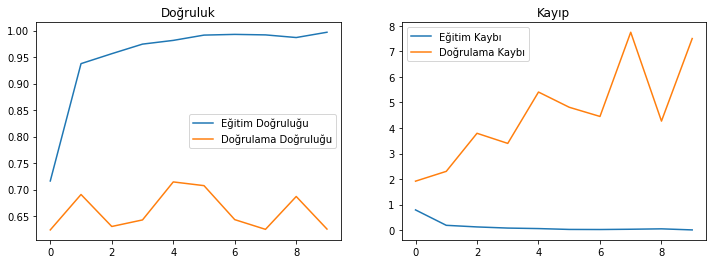

In [14]:
# Gerekli Kütüphaneleri İçe Aktarma
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Doğrulama verileri üzerinde tahmin yapma
validation_generator.reset()
predictions = cnn_model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Her emisyon için sınıflandırma raporu
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Sınıflandırma Raporu:\n", report)

# Karışıklık Matrisi (Confusion Matrix)
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.title('Confusion Matrix')
plt.show()

# Genel başarı metriklerini hesaplama
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted', zero_division=0)
recall = recall_score(true_classes, predicted_classes, average='weighted', zero_division=0)
f1 = f1_score(true_classes, predicted_classes, average='weighted', zero_division=0)

# Genel metrikleri yazdırma
print(f"Genel Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Genel Precision: {precision:.4f}")
print(f"Genel Recall: {recall:.4f}")
print(f"Genel F1-Score: {f1:.4f}")

# Eğitim ve Doğrulama Doğruluğunu Görselleştirme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Doğruluk')

# Eğitim ve Doğrulama Kayıpını Görselleştirme
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title('Kayıp')
plt.show()
